Name : Sagar Birajdar
AIML task1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv("D:\MOV & WEB SERIES\Dataset 11.csv")
df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [5]:
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


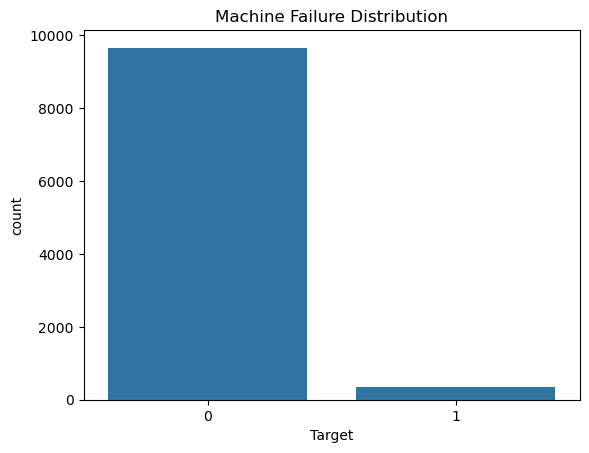

In [7]:
sns.countplot(x='Target', data=df)
plt.title("Machine Failure Distribution")
plt.show()

In [8]:
df = df.drop(['Product ID', 'Failure Type'], axis=1)
df.head()


,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1,M,298.1,308.6,1551,42.8,0,0
1,2,L,298.2,308.7,1408,46.3,3,0
2,3,L,298.1,308.5,1498,49.4,5,0
3,4,L,298.2,308.6,1433,39.5,7,0
4,5,L,298.2,308.7,1408,40.0,9,0


In [9]:
df = pd.get_dummies(df, columns=['Type'], drop_first=True)
df.head()


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_L,Type_M
0,1,298.1,308.6,1551,42.8,0,0,False,True
1,2,298.2,308.7,1408,46.3,3,0,True,False
2,3,298.1,308.5,1498,49.4,5,0,True,False
3,4,298.2,308.6,1433,39.5,7,0,True,False
4,5,298.2,308.7,1408,40.0,9,0,True,False


In [11]:
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [14]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [15]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)


Confusion Matrix:
[[1927    5]
 [  58   10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       0.67      0.15      0.24        68

    accuracy                           0.97      2000
   macro avg       0.82      0.57      0.61      2000
weighted avg       0.96      0.97      0.96      2000

ROC-AUC Score: 0.9007124588966021


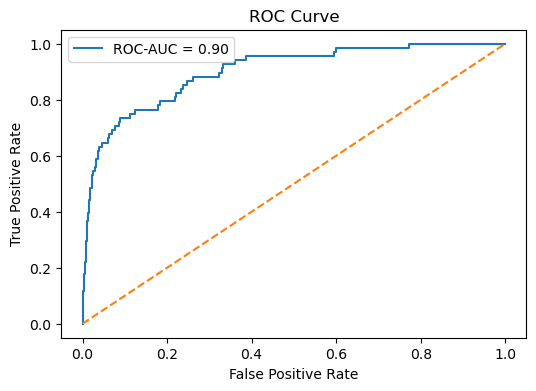

In [16]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [17]:
feature_importance = pd.Series(model.coef_[0], index=X.columns)
feature_importance.sort_values(ascending=False)


Air temperature [K]        0.842967
Type_L                     0.632106
Torque [Nm]                0.276678
Type_M                     0.138973
Tool wear [min]            0.012616
Rotational speed [rpm]     0.011396
UDI                        0.000039
Process temperature [K]   -0.930086
dtype: float64

## Conclusion

This project focuses on predicting machine failure using industrial sensor data.
A Logistic Regression model was chosen due to its simplicity, interpretability,
and suitability for binary classification problems.

The dataset was preprocessed by removing identifier and leakage columns and
encoding categorical variables. The model achieved a good ROC-AUC score,
indicating effective discrimination between failure and non-failure cases.

Key features such as tool wear time and torque were found to strongly influence
machine failure.

### Future Improvements
- Handle class imbalance using class weights
- Try non-linear models like Random Forest
- Perform cross-validation for more robust evaluation
- Apply feature scaling
